In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import re
import string

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')

nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
text_data = pd.read_csv('/content/email_data.csv')

In [10]:
text_data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [11]:
#ddroppong the unsignificant columns
text_data.drop(['Unnamed: 0', 'label_num'], axis=1, inplace=True)

In [12]:
text_data

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\nth...
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a..."
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\nthis deal is to ...
...,...,...
5166,ham,Subject: put the 10 on the ft\nthe transport v...
5167,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...
5168,ham,Subject: calpine daily gas nomination\n>\n>\nj...
5169,ham,Subject: industrial worksheets for august 2000...


In [13]:
### text preprocessing
round(text_data['label'].value_counts(normalize=True), 2)


,proportion
label,
ham,0.71
spam,0.29


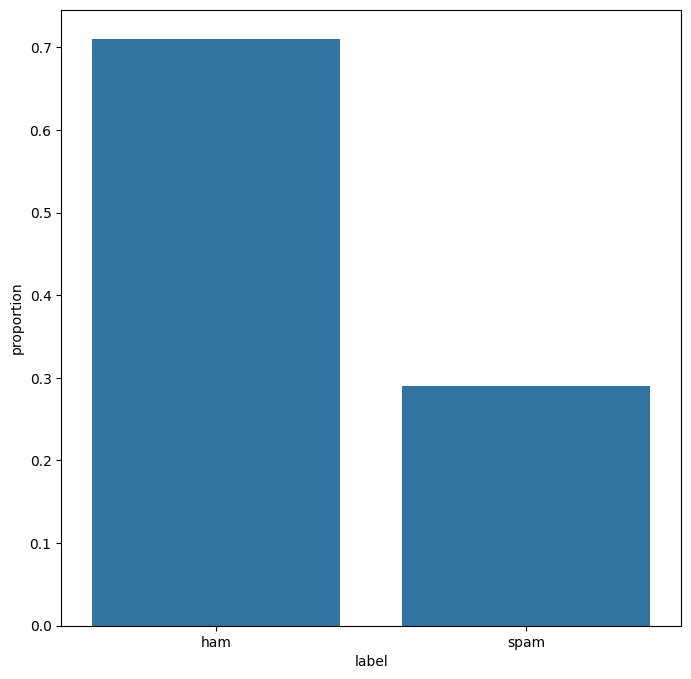

In [14]:
plt.figure(figsize=(8,8))
sns.barplot(data =text_data['label'].value_counts(normalize=True) )
plt.show()

In [15]:
##now lets do the text preparation like sent tokenizer and word tonkenizer, lemmatizing, stemming , using regex remobing the unnecessary chars

In [16]:
stemmer = PorterStemmer().stem
lemmatize = WordNetLemmatizer().lemmatize

In [17]:
def cleaning_texts(txt, flag):
  patrn = r'[^a-zA-Z]+'
  sent = re.sub(patrn, ' ', txt)
  sent = sent.lower()
  sent = sent.split()
  if(flag=='stem'):
    sent_stem = [stemmer(word) for word in sent if word not in stopwords.words('english')]
    sent_stem = ' '.join(sent_stem)
  else:
    sent_lem = [lemmatize(word) for word in sent if word not in stopwords.words('english')]
    sent_lem = ' '.join(sent_lem)
    return sent_lem




In [18]:
text_data['clean_lemmatize_data'] = text_data['text'].apply(lambda x: cleaning_texts(x,'lemma'))

In [19]:
text_data['clean_stemming_data'] = text_data['text'].apply(lambda x: cleaning_texts(x,'stem'))

In [20]:
text_data.head(10)

,label,text,clean_lemmatize_data,clean_stemming_data
0,ham,Subject: enron methanol ; meter # : 988291\nth...,subject enron methanol meter follow note gave ...,None
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",subject hpl nom january see attached file hpln...,None
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",subject neon retreat ho ho ho around wonderful...,None
3,spam,"Subject: photoshop , windows , office . cheap ...",subject photoshop window office cheap main tre...,None
4,ham,Subject: re : indian springs\nthis deal is to ...,subject indian spring deal book teco pvr reven...,None
5,ham,Subject: ehronline web address change\nthis me...,subject ehronline web address change message i...,None
6,ham,Subject: spring savings certificate - take 30 ...,subject spring saving certificate take save us...,None
7,spam,Subject: looking for medication ? we ` re the ...,subject looking medication best source difficu...,None
8,ham,Subject: noms / actual flow for 2 / 26\nwe agr...,subject noms actual flow agree forwarded melis...,None
9,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",subject nomination oct see attached file hplnl...,None


In [21]:
text_data['len_clean_data'] = text_data['clean_lemmatize_data'].apply(len)

In [22]:
text_data.head()

,label,text,clean_lemmatize_data,clean_stemming_data,len_clean_data
0,ham,Subject: enron methanol ; meter # : 988291\nth...,subject enron methanol meter follow note gave ...,None,216
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",subject hpl nom january see attached file hpln...,None,61
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",subject neon retreat ho ho ho around wonderful...,None,1383
3,spam,"Subject: photoshop , windows , office . cheap ...",subject photoshop window office cheap main tre...,None,388
4,ham,Subject: re : indian springs\nthis deal is to ...,subject indian spring deal book teco pvr reven...,None,187


In [23]:
##checking the ham tweets
ham_tweets = text_data[text_data['label']=='ham']

ham_tweets.head()

,label,text,clean_lemmatize_data,clean_stemming_data,len_clean_data
0,ham,Subject: enron methanol ; meter # : 988291\nth...,subject enron methanol meter follow note gave ...,None,216
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",subject hpl nom january see attached file hpln...,None,61
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",subject neon retreat ho ho ho around wonderful...,None,1383
4,ham,Subject: re : indian springs\nthis deal is to ...,subject indian spring deal book teco pvr reven...,None,187
5,ham,Subject: ehronline web address change\nthis me...,subject ehronline web address change message i...,None,295


In [24]:
spam_tweets = text_data[text_data['label']== 'spam']
spam_tweets.head()

,label,text,clean_lemmatize_data,clean_stemming_data,len_clean_data
3,spam,"Subject: photoshop , windows , office . cheap ...",subject photoshop window office cheap main tre...,None,388
7,spam,Subject: looking for medication ? we ` re the ...,subject looking medication best source difficu...,None,491
10,spam,Subject: vocable % rnd - word asceticism\nvcsc...,subject vocable rnd word asceticism vcsc brand...,None,4845
11,spam,Subject: report 01405 !\nwffur attion brom est...,subject report wffur attion brom est inst siup...,None,240
13,spam,Subject: vic . odin n ^ ow\nberne hotbox carna...,subject vic odin n ow berne hotbox carnal brid...,None,386


In [25]:
ham_tweets.describe()

,len_clean_data
count,3672.000000
mean,562.454248
std,840.387036
min,12.000000
25%,132.000000
50%,284.000000
75%,682.000000
max,20438.000000


In [26]:
spam_tweets.describe()

,len_clean_data
count,1499.000000
mean,847.927952
std,1361.694610
min,7.000000
25%,178.500000
50%,380.000000
75%,834.500000
max,21386.000000


In [27]:
###Data visualization
cv = CountVectorizer()
sum_words = cv.fit_transform(ham_tweets['clean_lemmatize_data']).sum(axis=0)
words_freq = [(word,sum_words[0,i]) for word,i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x:x[1], reverse = True)
df_ham_repeated_words = pd.DataFrame(words_freq[0:40:], columns=['words','count'])
df_ham_repeated_words

,words,count
0,ect,13897
1,hou,7281
2,enron,6555
3,subject,6405
4,deal,3534
5,gas,2861
6,com,2717
7,please,2715
8,meter,2713
9,cc,2379


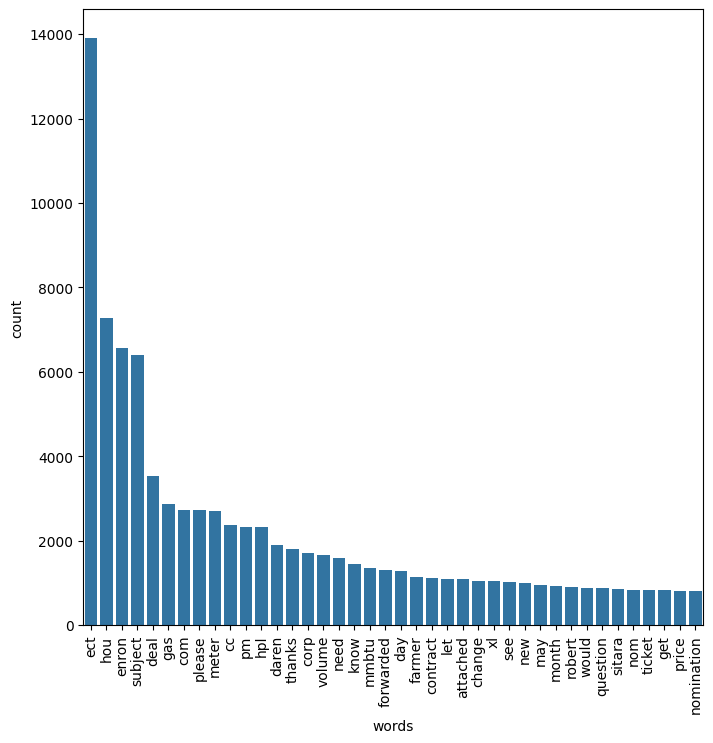

In [28]:
plt.figure(figsize=(8,8))
sns.barplot(data =df_ham_repeated_words, x='words', y='count')
plt.xticks(rotation=90)
plt.show()

In [29]:
cv = CountVectorizer()
sum_words = cv.fit_transform(spam_tweets['clean_lemmatize_data'])
words_freq = [(words,sum_words[0,i]) for words,i in cv.vocabulary_.items()]
words_freq = sorted(words_freq , key = lambda x:x[1], reverse=True)
spam_repeated_words = pd.DataFrame(words_freq[0:40:] , columns = ['words','count'])
spam_repeated_words.head()

,words,count
0,subject,1
1,photoshop,1
2,window,1
3,office,1
4,cheap,1


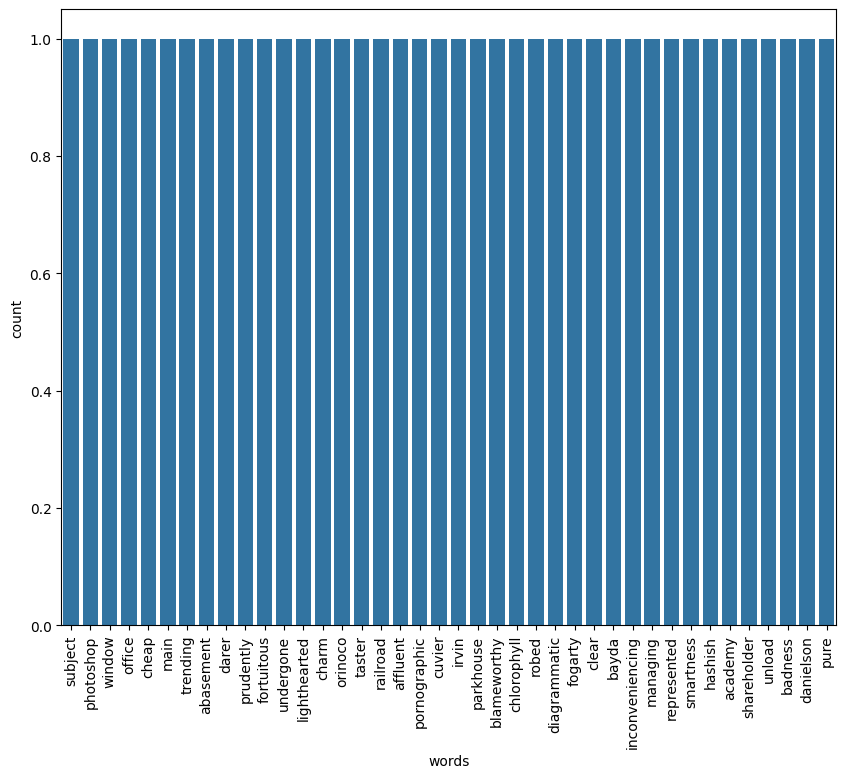

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(data =spam_repeated_words ,x='words', y='count')
plt.xticks(rotation=90)
plt.show()

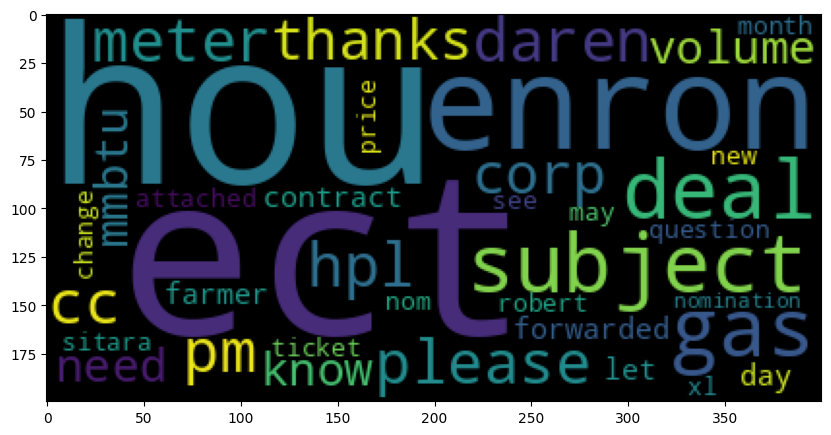

In [31]:
###DAT Visualization
from wordcloud import WordCloud
wc = WordCloud().generate(' '.join(df_ham_repeated_words['words']))
plt.figure(figsize=(10,9))
plt.imshow(wc)
plt.show()

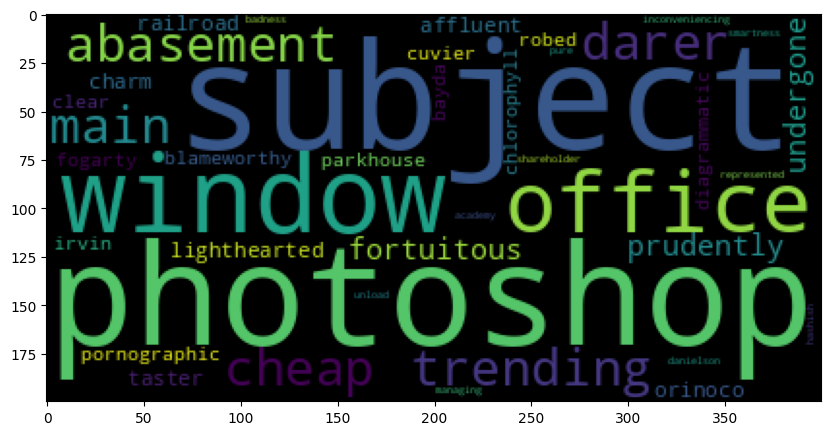

In [32]:
from wordcloud import WordCloud
wc = WordCloud().generate(' '.join(spam_repeated_words['words']))
plt.figure(figsize=(10,9))
plt.imshow(wc)
plt.show()

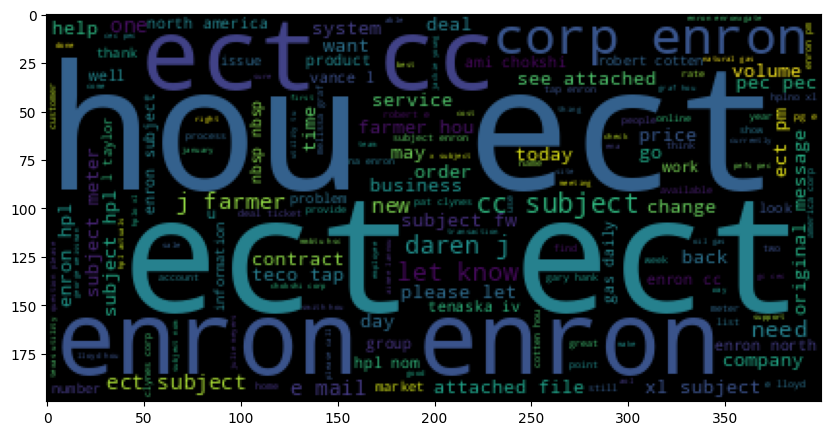

In [33]:
##most repeated words in the whole data
wc = WordCloud().generate(' '.join(text_data['clean_lemmatize_data']))
plt.figure(figsize=(10,9))
plt.imshow(wc)
plt.show()

In [34]:
##removign this subject word as it is just repeated in all tweets
sub = 'subject says good morning'
sub = re.sub(r'\bsubject\b', ' ', sub).strip()
sub

'says good morning'

In [35]:
def remove_sub(text):
  sent = re.sub(r'\bsubject\b', ' ',text).strip()
  return sent

In [36]:
text_data['clean_lemmatize_data_1'] = text_data['clean_lemmatize_data'].apply(lambda x:remove_sub(x))

In [37]:
text_data.head()

,label,text,clean_lemmatize_data,clean_stemming_data,len_clean_data,clean_lemmatize_data_1
0,ham,Subject: enron methanol ; meter # : 988291\nth...,subject enron methanol meter follow note gave ...,None,216,enron methanol meter follow note gave monday p...
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",subject hpl nom january see attached file hpln...,None,61,hpl nom january see attached file hplnol xl hp...
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",subject neon retreat ho ho ho around wonderful...,None,1383,neon retreat ho ho ho around wonderful time ye...
3,spam,"Subject: photoshop , windows , office . cheap ...",subject photoshop window office cheap main tre...,None,388,photoshop window office cheap main trending ab...
4,ham,Subject: re : indian springs\nthis deal is to ...,subject indian spring deal book teco pvr reven...,None,187,indian spring deal book teco pvr revenue under...


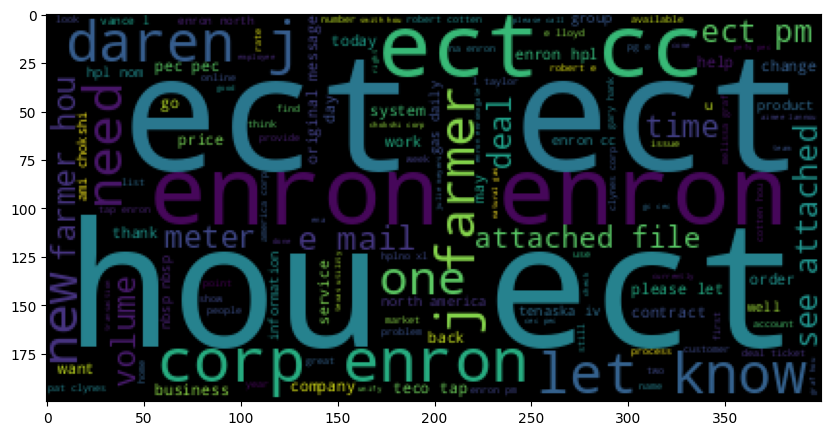

In [38]:
wc = WordCloud().generate(' '.join(text_data['clean_lemmatize_data_1']))
plt.figure(figsize=(10,9))
plt.imshow(wc)
plt.show()

In [39]:
x = text_data['clean_lemmatize_data_1']
y= text_data['label']

In [40]:
### cpnverting the text into numeric form
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape
x_test.shape
y_train.value_counts()
y_test.value_counts()

,count
label,
ham,735
spam,300


In [41]:
tfid_vect = TfidfVectorizer()
x_train_vect = tfid_vect.fit_transform(x_train).toarray()
x_test_vect = tfid_vect.transform(x_test).toarray()

In [42]:
from sklearn.naive_bayes import MultinomialNB
naive_mod = MultinomialNB()
naive_mod.fit(x_train_vect,y_train)

MultinomialNB()

In [43]:
##predict
y_test_pred = naive_mod.predict(x_test_vect)

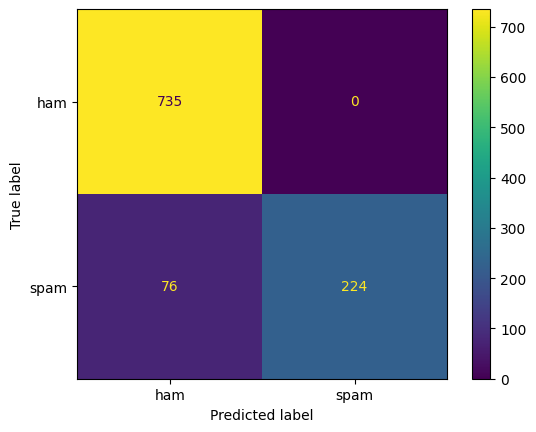

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
cmd = ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
cmd



In [45]:
cr = classification_report(y_test, y_test_pred)
print(cr)

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       735
        spam       1.00      0.75      0.85       300

    accuracy                           0.93      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.93      0.92      1035

